# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Task Reframed as a Data Task

* We are looking to perform an exploratory data analysis (EDA) and predictive modeling on a dataset of used car listings.
* The primary objective is to identify which features (variables) in the dataset, such as make, model, year, mileage, and condition, are most predictive of the car's price.
* This will involve data cleaning, feature engineering, and statistical analysis to uncover correlations and patterns.
* We will use regression models to quantify the relationship between these features and the car price, aiming to develop a predictive model that can estimate a car’s value based on its characteristics.
* The effectiveness of the model will be evaluated based on its accuracy and ability to generalize to new data.
By following this approach, we can convert the business need into a clear data analysis and modeling strategy.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Data Understanding Steps

1. **Initial Data Exploration**:
   - **View Basic Information**: Use methods like `df.info()` to get an overview of the dataset, including the number of entries, column names, data types, and the presence of null values.
   - **Summary Statistics**: Apply `df.describe()` to see summary statistics for numerical columns. This helps in understanding the distribution of data, detecting outliers, and identifying any unusual values.
2. **Exploratory Data Analysis (EDA)**:
   - **Visualizations**: explore the dataset using visualizations and statistical summaries to understand the relationships between different variables, especially those related to car prices.
   

2. **Data Cleaning and Preprocessing**:
   - **Handling Missing Values**: Identify columns with missing values and decide how to address them (e.g., imputation, removal).
   - **Data Type Consistency**: Ensure each column is of the appropriate data type (e.g., numerical, categorical, datetime).
   - **Detecting and Handling Outliers**: Use statistical methods or visualization tools to detect outliers and decide how to treat them.

3. **Exploratory Data Analysis (EDA)**:
   - **Univariate Analysis**: Examine each variable individually (e.g., histograms for continuous variables, bar charts for categorical variables).
   - **Bivariate/Multivariate Analysis**: Explore relationships between variables using scatter plots, correlation matrices, and cross-tabulations.
   - **Temporal Analysis**: If the dataset has a time component (e.g., year of manufacture), analyze trends over time.

4. **Data Quality Assessment**:
   - **Consistency Checks**: Look for inconsistencies or anomalies in the data (e.g., a car model that doesn't match the make).
   - **Validity Checks**: Ensure data conforms to known valid ranges or formats (e.g., year of the car should not be in the future).
   - **Accuracy and Completeness**: Assess how accurate and complete the data is, considering potential biases or missing segments.

5. **Feature Engineering**:
   - **Deriving New Variables**: Create new features that might be relevant for analysis (e.g., car age, brand popularity).
   - **Categorizing or Binning**: Group continuous variables into categories or bins if useful.

6. **Documentation**:
   - **Record Findings and Decisions**: Document the steps taken, observations made, and any decisions regarding data handling.

7. **Preparing for Next Steps**:
   - **Identify Potential Variables of Interest**: Based on EDA, identify which variables may be most relevant for predicting car prices.
   - **Plan for Modeling**: Consider what types of statistical or machine learning models might be appropriate given the nature of the data.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
file_path = 'data/vehicles.csv'
car_data = pd.read_csv(file_path)

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
car_data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
# Checking for missing values
missing_values = car_data.isnull().sum()

# Checking data types
data_types = car_data.dtypes

missing_values, data_types

(id                   0
 region               0
 price                0
 year              1205
 manufacturer     17646
 model             5277
 condition       174104
 cylinders       177678
 fuel              3013
 odometer          4400
 title_status      8242
 transmission      2556
 VIN             161042
 drive           130567
 size            306361
 type             92858
 paint_color     130203
 state                0
 dtype: int64,
 id                int64
 region           object
 price             int64
 year            float64
 manufacturer     object
 model            object
 condition        object
 cylinders        object
 fuel             object
 odometer        float64
 title_status     object
 transmission     object
 VIN              object
 drive            object
 size             object
 type             object
 paint_color      object
 state            object
 dtype: object)

### Data Preparation Actions

* Handle Missing Values: For columns with a high percentage of missing data (like condition, cylinders, VIN, drive, size, paint_color), we might consider dropping them if they are not critical for our analysis. For others, we can decide to fill in missing values or drop rows based on the context.
* Remove Outliers in Price and Odometer: We'll need to define and remove outliers in the price and odometer columns, as extreme values can skew the analysis.
* Trimming the Dataset: Remove irrelevant columns to focus our analysis on factors affecting car prices.

In [6]:
# Dropping columns with a high percentage of missing values
columns_to_drop = ['condition', 'cylinders', 'VIN', 'drive', 'size', 'paint_color']
car_data_cleaned = car_data.drop(columns=columns_to_drop)

# Filling missing values or dropping rows for other columns
# For 'year' and 'odometer', we'll fill missing values with the median
car_data_cleaned['year'] = car_data_cleaned['year'].fillna(car_data_cleaned['year'].median())
car_data_cleaned['odometer'] = car_data_cleaned['odometer'].fillna(car_data_cleaned['odometer'].median())

# For 'manufacturer', 'model', 'fuel', 'title_status', 'transmission', drop rows with missing values
car_data_cleaned = car_data_cleaned.dropna(subset=['manufacturer', 'model', 'fuel', 'title_status', 'transmission'])

# Define the upper limit for outliers
price_upper_limit = car_data_cleaned['price'].quantile(0.99)
odometer_upper_limit = car_data_cleaned['odometer'].quantile(0.99)

price_lower_limit = car_data_cleaned['price'].quantile(0.01)
odometer_lower_limit = car_data_cleaned['odometer'].quantile(0.01)

# Remove price outliers
car_data_cleaned = car_data_cleaned[
    (car_data_cleaned['price'] <= price_upper_limit) & (car_data_cleaned['price'] >= price_lower_limit)]

# Remove odometer outliers
car_data_cleaned = car_data_cleaned[
    (car_data_cleaned['odometer'] <= odometer_upper_limit) & (car_data_cleaned['odometer'] >= odometer_lower_limit)]


# Check the cleaned dataset
car_data_cleaned.info(), car_data_cleaned.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 381453 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            381453 non-null  int64  
 1   region        381453 non-null  object 
 2   price         381453 non-null  int64  
 3   year          381453 non-null  float64
 4   manufacturer  381453 non-null  object 
 5   model         381453 non-null  object 
 6   fuel          381453 non-null  object 
 7   odometer      381453 non-null  float64
 8   title_status  381453 non-null  object 
 9   transmission  381453 non-null  object 
 10  type          302054 non-null  object 
 11  state         381453 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 37.8+ MB


(None,
                  id          price           year       odometer
 count  3.814530e+05  381453.000000  381453.000000  381453.000000
 mean   7.311502e+09   16963.840426    2011.713606   91048.212118
 std    4.376078e+06   13592.169842       8.313710   58852.215951
 min    7.301583e+09       0.000000    1900.000000      17.000000
 25%    7.308156e+09    5995.000000    2009.000000   40136.000000
 50%    7.312648e+09   13995.000000    2014.000000   85757.000000
 75%    7.315254e+09   25995.000000    2017.000000  132078.000000
 max    7.317101e+09   64999.000000    2022.000000  267000.000000)

In [7]:
car_data_cleaned.head()

,id,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al


### Data Visualization

* Explore the dataset using visualizations to understand the relationships between different variables.

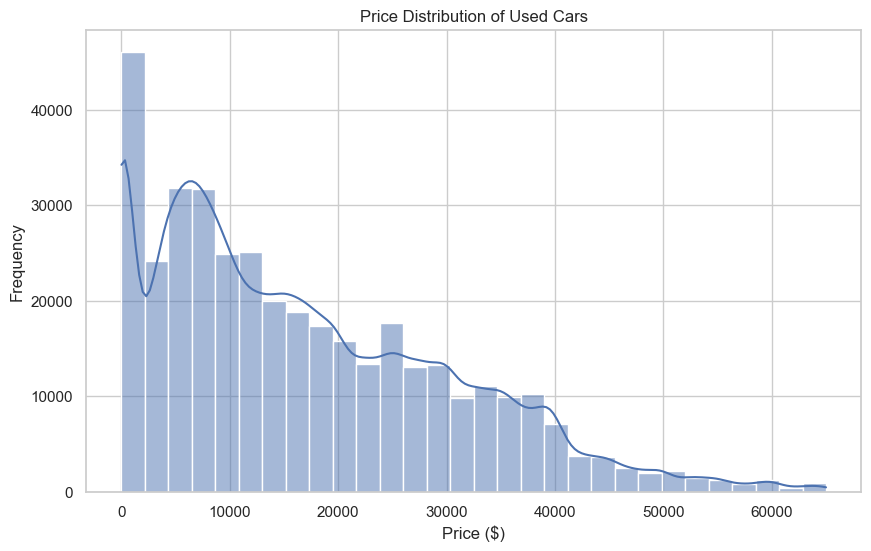

In [8]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(car_data_cleaned['price'], kde=True, bins=30)
plt.title('Price Distribution of Used Cars')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

The Price Distribution plot shows a wide range of prices, with a concentration of cars in the lower price range and fewer cars as the price increases. This distribution is expected in a used car market.

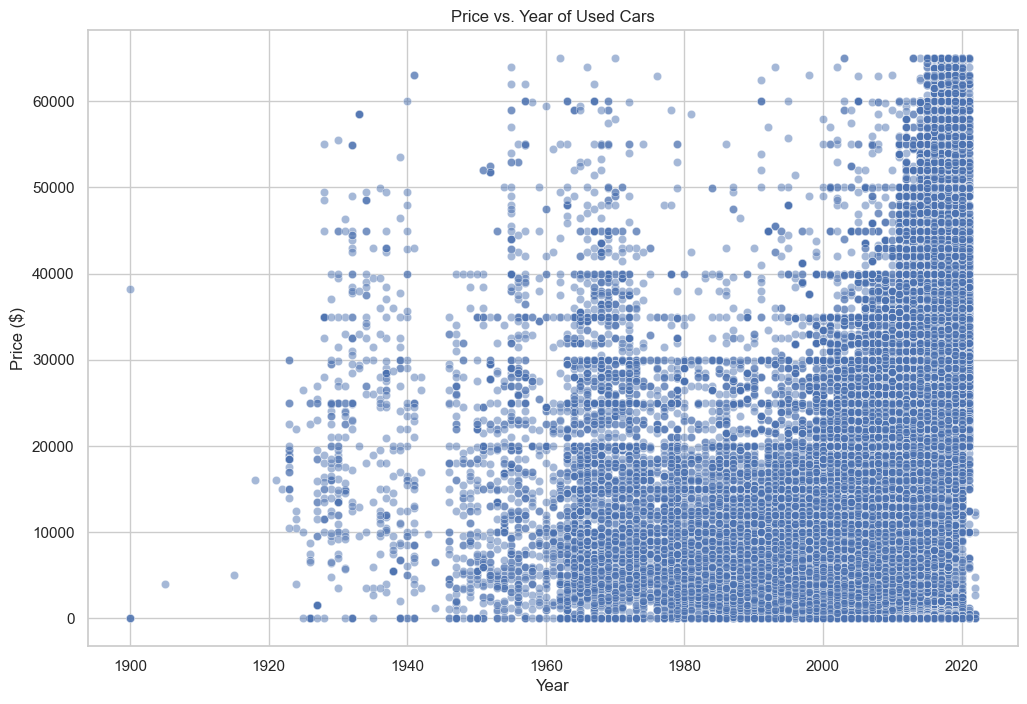

In [9]:
# Price vs. Age
plt.figure(figsize=(12, 8))
sns.scatterplot(x='year', y='price', data=car_data_cleaned, alpha=0.5)
plt.title('Price vs. Year of Used Cars')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.show()

The scatter plot of Price vs. Year indicates a general trend where newer cars (those with more recent years) tend to have higher prices. This trend is consistent with expectations, as newer used cars usually retain more value.

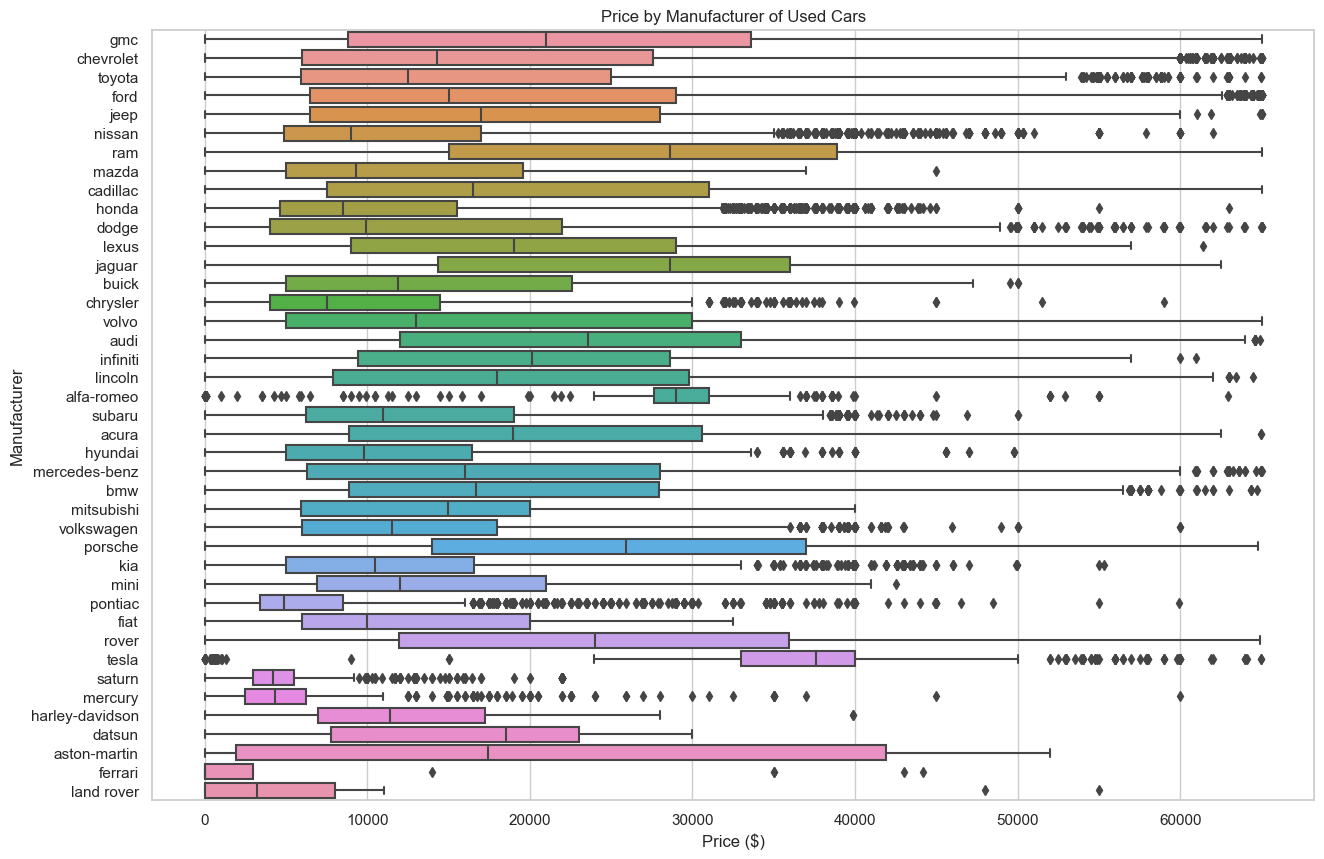

In [10]:
# Price by Manufacturer
plt.figure(figsize=(15, 10))
sns.boxplot(x='price', y='manufacturer', data=car_data_cleaned, orient='h')
plt.title('Price by Manufacturer of Used Cars')
plt.xlabel('Price ($)')
plt.ylabel('Manufacturer')
plt.show()

The boxplot of Price by Manufacturer reveals variations in the median and range of prices among different car manufacturers. Some brands show a higher median price and a wider range, indicating a mix of both premium and standard models. Others have a narrower price range, suggesting a more uniform pricing strategy.

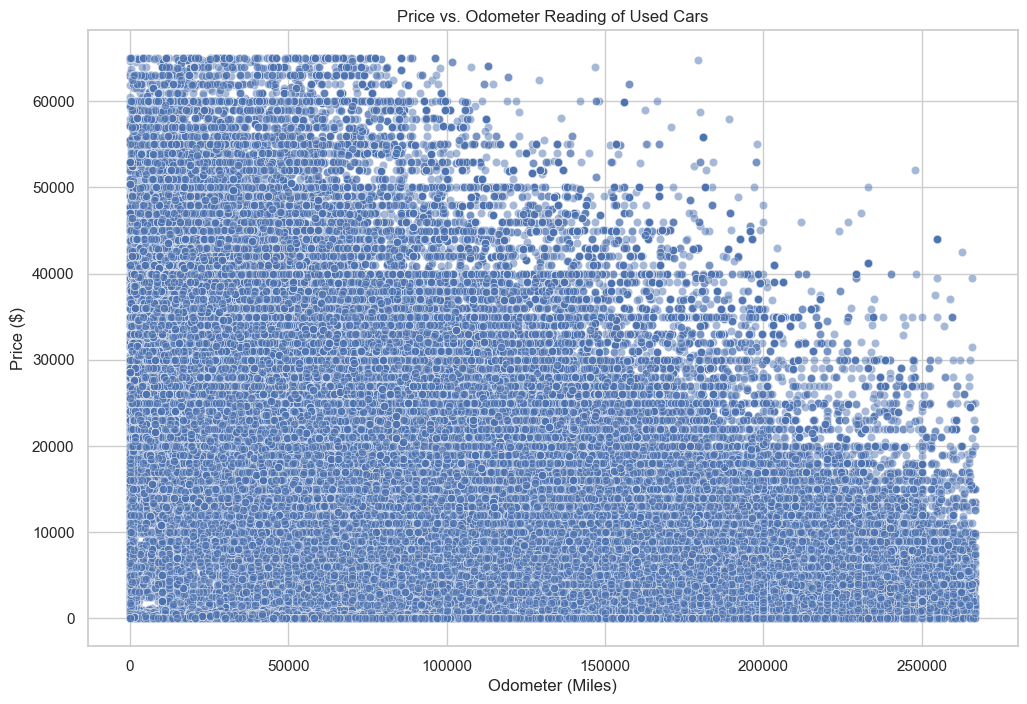

In [11]:
# Price vs. Odometer Reading
plt.figure(figsize=(12, 8))
sns.scatterplot(x='odometer', y='price', data=car_data_cleaned, alpha=0.5)
plt.title('Price vs. Odometer Reading of Used Cars')
plt.xlabel('Odometer (Miles)')
plt.ylabel('Price ($)')
plt.show()

The scatter plot of Price vs. Odometer Reading shows a general trend where cars with lower mileage tend to have higher prices. This is in line with expectations, as cars with less wear and tear (lower mileage) are typically valued more.

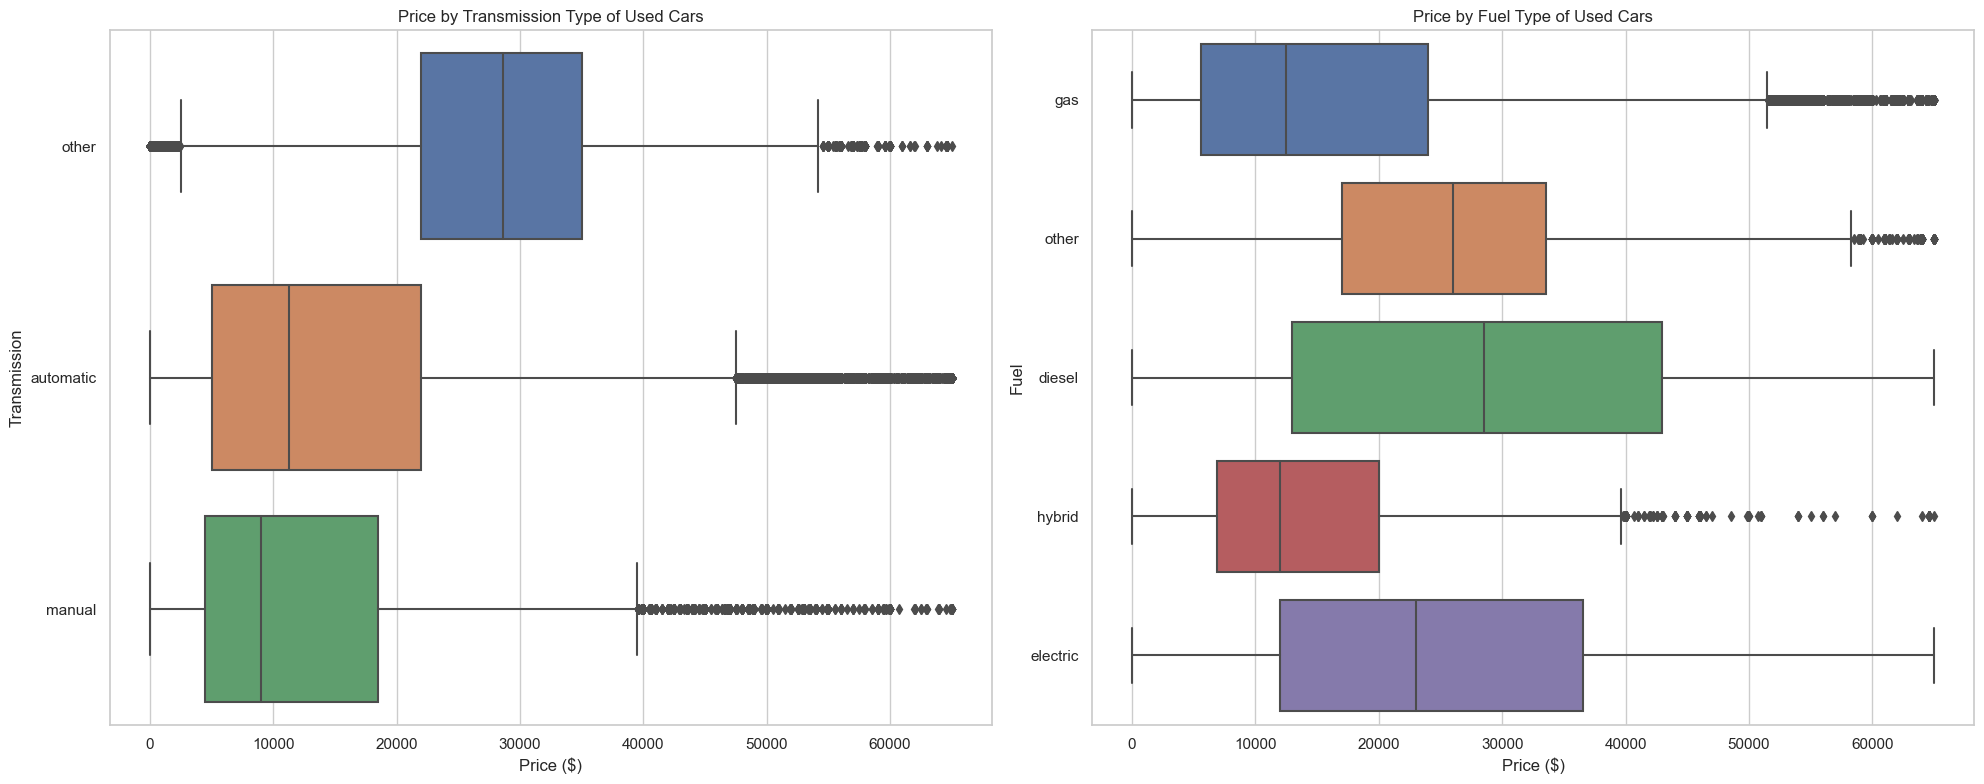

In [12]:
# Setting up the figure for two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Price by Transmission Type
sns.boxplot(x='price', y='transmission', data=car_data_cleaned, ax=axes[0])
axes[0].set_title('Price by Transmission Type of Used Cars')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Transmission')

# Price by Fuel Type
sns.boxplot(x='price', y='fuel', data=car_data_cleaned, ax=axes[1])
axes[1].set_title('Price by Fuel Type of Used Cars')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Fuel')

plt.tight_layout()
plt.show()

Transmission Type: There are differences in price distribution among different transmission types. Certain types, such as automatic, might have a higher median price.

Fuel Type: Similar to transmission, the fuel type also shows variations in price distribution. Some fuel types, like gas and diesel, have different price ranges, which could indicate consumer preferences.

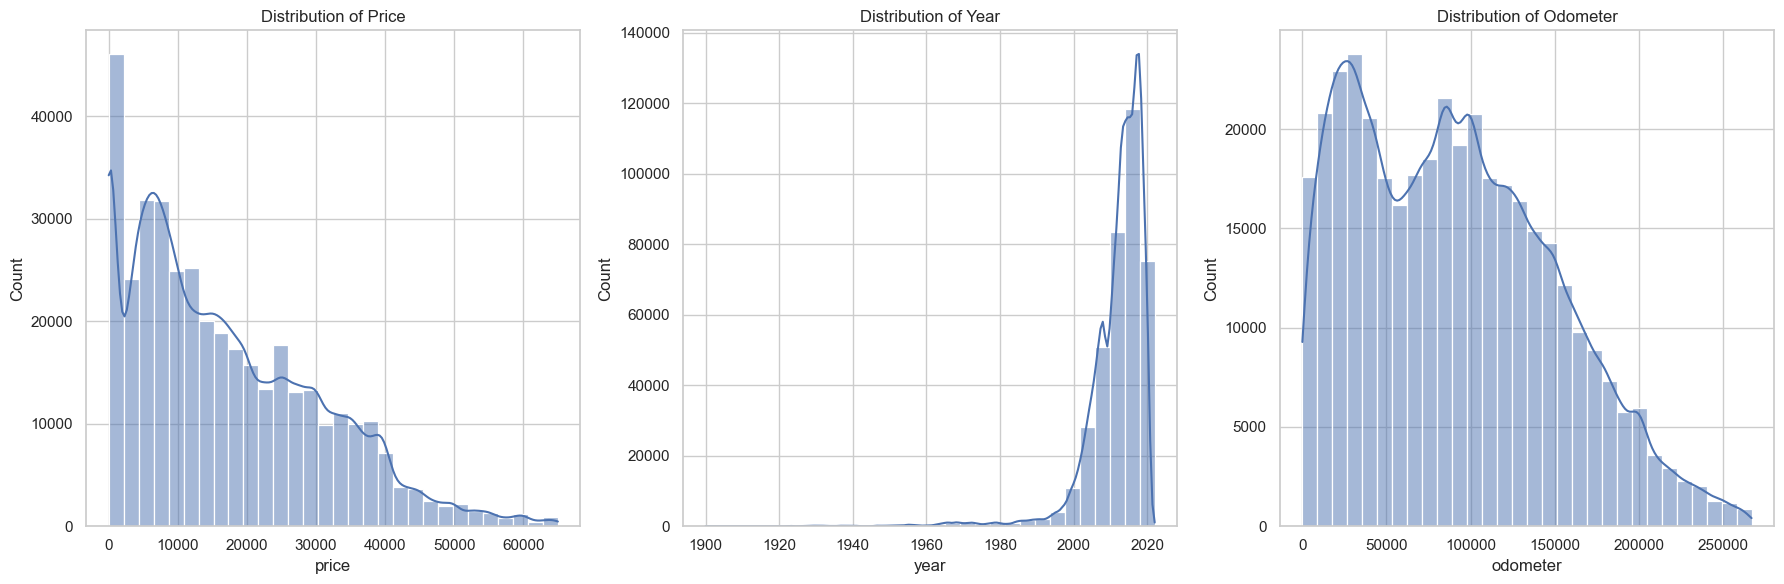

/var/folders/pf/gpj5k0_n5dl53cp91j7cc_h00000gn/T/ipykernel_19690/699377733.py:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = car_data_cleaned.corr()


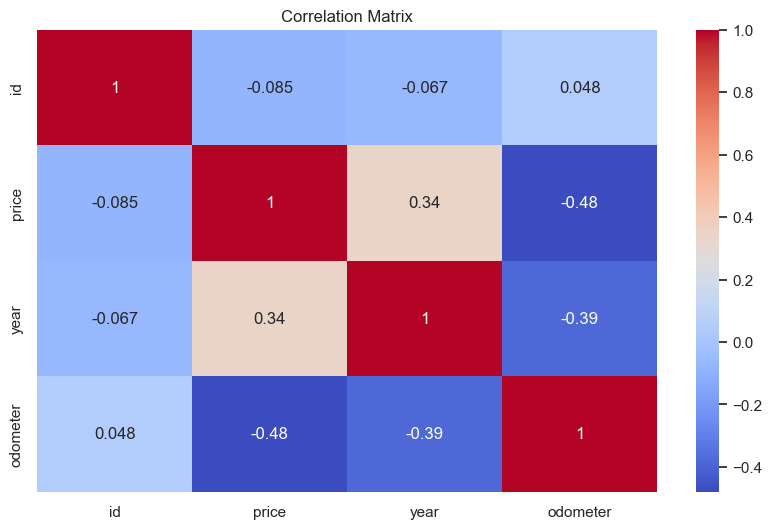

In [13]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting distributions of key numerical features: 'price', 'year', and 'odometer'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Price distribution
sns.histplot(car_data_cleaned['price'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Price')

# Year distribution
sns.histplot(car_data_cleaned['year'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Year')

# Odometer distribution
sns.histplot(car_data_cleaned['odometer'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Distribution of Odometer')

plt.tight_layout()
plt.show()

# Correlation analysis
correlation_matrix = car_data_cleaned.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


* There's a moderate positive correlation between the year of the car and its price, indicating that newer cars tend to be priced higher.
* The odometer reading shows a negative correlation with price, suggesting that cars with higher mileage are generally priced lower.
* The correlation between year and odometer is also negative, as expected, since older cars typically have more miles.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [9]:
# One-hot encode the categorical columns
categorical_columns = car_data_cleaned.select_dtypes(include=['object']).columns

car_data_cleaned = pd.get_dummies(car_data_cleaned, categorical_columns)

car_data_cleaned.shape 

pd.set_option('display.max_columns', None)

categorical_columns

Index(['region', 'manufacturer', 'model', 'fuel', 'title_status',
       'transmission', 'type', 'state'],
      dtype='object')

In [10]:
# Preparing the data for modeling

# Normalizing Numerical Features
scaler = StandardScaler()
numerical_columns = ['price', 'odometer', 'year']
car_data_cleaned[numerical_columns] = scaler.fit_transform(car_data_cleaned[numerical_columns])

# Separating the target variable (price) and features
X = car_data_cleaned.drop('price', axis=1)
y = car_data_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((305162, 21773), (76291, 21773), (305162,), (76291,))

#### Linear Regression

In [16]:
%%time
# Linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
train_predictions = lr_model.predict(X_train)
test_predictions = lr_model.predict(X_test)

# Evaluating the model
lr_train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
lr_test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
lr_r2 = r2_score(y_test, test_predictions)

print(f"Linear Regression Training RMSE: {lr_train_rmse}")
print(f"Linear Regression Test RMSE: {lr_test_rmse}")
print(f"Linear Regression R²: {lr_r2}")

Linear Regression Training RMSE: 0.5660684593849609
Linear Regression Test RMSE: 0.6112011488619321
Linear Regression R²: 0.6269072850423084


#### Linear Regression Cross-Validation

In [ ]:
# Perform 5-fold cross-validation
scores_lr_model = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the scores
mean_mse_lr_model = np.mean(scores_lr_model)
std_mse_lr_model = np.std(scores_lr_model)

print("LR Model Mean MSE:", mean_mse_lr_model)
print("LR Model Standard Deviation of MSE:", std_mse_lr_model)

#### Forest Regressor (estimators=10)

In [22]:
%%time
# Random Forest Regressor model
rf_10_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_10_model.fit(X_train, y_train)

# Predictions
rf_10_train_predictions = rf_10_model.predict(X_train)
rf_10_test_predictions = rf_10_model.predict(X_test)

# Evaluating the model
rf_10_train_rmse = mean_squared_error(y_train, rf_10_train_predictions, squared=False)
rf_10_test_rmse = mean_squared_error(y_test, rf_10_test_predictions, squared=False)
rf_10_r2 = r2_score(y_test, rf_10_test_predictions)

print(f'Random Forest Training (estimators=10) Evaluation')
print(f'Training RMSE: {rf_10_train_rmse}')
print(f'Test RMSE: {rf_10_test_rmse}')
print(f"R²: {rf_10_r2}")

Random Forest Training (estimators=10) Evaluation
Training RMSE: 0.19494742976680787
Test RMSE: 0.4623566159720239
R²: 0.78649768024049
CPU times: user 10min 4s, sys: 16.5 s, total: 10min 21s
Wall time: 10min 30s


In [20]:
print(f'Random Forest Training (estimators=10) Evaluation')
print(f'Training RMSE: {rf_10_train_rmse}')
print(f'Test RMSE: {rf_10_test_rmse}')
print(f"R²: {rf_10_r2}")

Random Forest Training (estimators=10) Evaluation
Training RMSE: 0.19494742976680787
Test RMSE: 0.4623566159720239
R²: 0.78649768024049


#### Forest Regressor (estimators=10) Cross-Validation

In [ ]:
# Perform 5-fold cross-validation
scores_rf_10_model = cross_val_score(rf_10_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the scores
mean_mse_rf_10_model = np.mean(scores_rf_10_model)
std_mse_rf_10_model = np.std(scores_rf_10_model)

print("Random Forest (estimators=10 ) Mean MSE:", mean_mse_rf_10_model)
print("Random Forest (estimators=10 ) Standard Deviation of MSE:", std_mse_rf_10_model)

####  Forest Regressor (estimators=10) Feature Importances

In [17]:
# Feature Importances Random Forest (estimators=10)
feature_importances = rf_10_model.feature_importances_

# Create tuples of feature names and their importances
features = X_train.columns
feature_importances_with_names = list(zip(features, feature_importances))

# Sort the feature importances by most important first and filter out 'id'
sorted_feature_importances = [
    item for item in sorted(feature_importances_with_names, key=lambda x: x[1], reverse=True) if item[0] != 'id']

# Print the top 20 features
print("Forest Regressor (estimators=10) - Top 20 feature importances:")
for feature, importance in sorted_feature_importances[:20]:
    print(f"{feature}: {importance}")

Forest Regressor (estimators=10) - Top 20 feature importances:
year: 0.27633471906476226
odometer: 0.13151792635661722
fuel_diesel: 0.052138366646644264
type_pickup: 0.02970938098147093
transmission_other: 0.022429955581187638
type_truck: 0.02109354429134578
type_sedan: 0.01573269318041188
state_or: 0.009147611248102762
type_SUV: 0.005518671411524021
state_ca: 0.005370353329861878
type_hatchback: 0.005318808285949915
manufacturer_chevrolet: 0.004913682804891987
manufacturer_mercedes-benz: 0.0043717463052906
manufacturer_ford: 0.004284932870028563
manufacturer_kia: 0.004181053796364126
manufacturer_bmw: 0.004066378944612346
manufacturer_volkswagen: 0.004009552666276542
manufacturer_nissan: 0.0039880048701580635
manufacturer_lexus: 0.0038449841323714602
state_ok: 0.0037195710606047505


#### Forest Regressor (estimators=100)

In [23]:
%%time
# Random Forest Regressor model
rf_100_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_100_model.fit(X_train, y_train)

# Predictions
rf_100_train_predictions = rf_100_model.predict(X_train)
rf_100_test_predictions = rf_100_model.predict(X_test)

# Evaluating the model
rf_100_train_rmse = mean_squared_error(y_train, rf_100_train_predictions, squared=False)
rf_100_test_rmse = mean_squared_error(y_test, rf_100_test_predictions, squared=False)
rf_100_r2 = r2_score(y_test, rf_100_test_predictions)

print(f'Random Forest Training (estimators=100) Evaluation')
print(f'Training RMSE: {rf_100_train_rmse}')
print(f'Test RMSE: {rf_100_test_rmse}')
print(f"R²: {rf_100_r2}")

Random Forest Training (estimators=100) Evaluation
Training RMSE: 0.16558657778169564
Test RMSE: 0.4444565221120193
R²: 0.8027091188908202
CPU times: user 1h 39min 55s, sys: 20.3 s, total: 1h 40min 15s
Wall time: 2h 53min 28s


#### Forest Regressor (estimators=100) Cross-Validation

In [ ]:
# Perform 5-fold cross-validation
scores_rf_100_model = cross_val_score(rf_100_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the scores
mean_mse_rf_100_model = np.mean(scores_rf_100_model)
std_mse_rf_100_model = np.std(scores_rf_100_model)

print("Random Forest (estimators=100 ) Mean MSE:", mean_mse_rf_100_model)
print("Random Forest (estimators=100 ) Standard Deviation of MSE:", std_mse_rf_100_model)

####  Forest Regressor (estimators=100) Feature Importances

In [21]:
# Feature Importances Random Forest (estimators=100)
feature_importances = rf_100_model.feature_importances_

# Create tuples of feature names and their importances
features = X_train.columns
feature_importances_with_names = list(zip(features, feature_importances))

# Sort the feature importances by most important first and filter out 'ID'
sorted_feature_importances = [
    item for item in sorted(feature_importances_with_names, key=lambda x: x[1], reverse=True) if item[0] != 'id']

# Print the top 20 features
print("Forest Regressor (estimators=100) - Top 20 feature importances:")
for feature, importance in sorted_feature_importances[:20]:
    print(f"{feature}: {importance}")

Forest Regressor (estimators=100) - Top 20 feature importances:
year: 0.27633471906476226
odometer: 0.13151792635661722
fuel_diesel: 0.052138366646644264
type_pickup: 0.02970938098147093
transmission_other: 0.022429955581187638
type_truck: 0.02109354429134578
type_sedan: 0.01573269318041188
state_or: 0.009147611248102762
type_SUV: 0.005518671411524021
state_ca: 0.005370353329861878
type_hatchback: 0.005318808285949915
manufacturer_chevrolet: 0.004913682804891987
manufacturer_mercedes-benz: 0.0043717463052906
manufacturer_ford: 0.004284932870028563
manufacturer_kia: 0.004181053796364126
manufacturer_bmw: 0.004066378944612346
manufacturer_volkswagen: 0.004009552666276542
manufacturer_nissan: 0.0039880048701580635
manufacturer_lexus: 0.0038449841323714602
state_ok: 0.0037195710606047505


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Linera Regression Evaluation

* Training RMSE: 0.5660684593849609
* Test RMSE: 0.6112011488619321
* R²: 0.6269072850423084
 
The difference between the training and test RMSE is not very large, which is a good sign. It implies that the model isn't overfitting significantly to the training data. An R² of 0.6269 means that approximately 62.69% of the variance in the target variable can be explained by the model's inputs. While this is a decent value, indicating a moderate level of prediction accuracy, there's still a significant portion of variance unexplained by the model.

The R² value shows that the model has a moderate predictive power. While it can explain a good portion of the variance in the target variable, there's room for improvement.

#### Forest Regressor (estimators=10) Evaluation

* Training RMSE: 0.1949
* Test RMSE: 0.4623
* R²: 0.78649768024049
 
The test RMSE is more than twice the training RMSE. This discrepancy could indicate overfitting.
An R² of 0.7865 is relatively high, suggesting that about 78.65% of the variance in the target variable is explained by the model's inputs.



#### Forest Regressor (estimators=100) Evaluation

* Training RMSE: 0.16558657778169564
* Test RMSE: 0.4444565221120193
* R²: 0.8027091188908202
 
1.  Training RMSE: 0.1656, Test RMSE: 0.4445

    -   Both training and test RMSE are lower than in the 10-estimator model, suggesting improved performance.
    -   The difference between training and test RMSE is still present, but it's smaller, indicating reduced overfitting.
2.  R²: 0.8027

    -   An improvement in R² value compared to the 10-estimator model, indicating a better fit of the model to the data.
3.  Feature Importances:

    -   Interestingly, the top feature importances are identical to those in the 10-estimator model. This consistency suggests these features are robust predictors across different model specifications.
    
#### Forest Regressor Cross-Validation 
    
Forest Regressor (estimators=10) Cross-Validation
* Random Forest (estimators=10 ) Mean MSE: -0.3784797248783359
* Random Forest (estimators=10 ) Standard Deviation of MSE: 0.08814577751926038

Forest Regressor (estimators=100) Cross-Validation
* Random Forest (estimators=100 ) Mean MSE: -0.36428283429572467
* Random Forest (estimators=100 ) Standard Deviation of MSE: 0.086496670625593 
    
The model with 100 estimators shows a slightly better and more consistent performance than the one with 10 estimators in terms of MSE.    
    

### Overall Evaluation

-   Improved Performance with More Estimators: The model with 100 estimators shows better generalization and reduced overfitting compared to the model with 10 estimators. This is evident from the lower and more balanced RMSE values and the higher R².
-   Consistency in Feature Importance: The fact that the top features by importance are the same in both models reinforces their significance in predicting used car prices.
-   Considerations for Overfitting: While the model with 100 estimators has reduced overfitting compared to the 10-estimator model, it's still a factor to consider. Cross-validation could provide a more comprehensive evaluation.

### Recommendations

-   Further Increase in Estimators: Experiment with further increasing the number of estimators to see if it continues to reduce overfitting and improve model performance.
-   Hyperparameter Tuning: Besides the number of estimators, explore tuning other hyperparameters of the Random Forest to optimize performance.
-   Cross-Validation: Implement cross-validation to validate these findings and assess model stability.
-   Feature Exploration: Continue exploring feature engineering and selection, as the impact of features like 'year' and 'odometer' is quite significant.

In summary, increasing the number of estimators in your Random Forest model has led to improved performance and reduced signs of overfitting, making the model with 100 estimators preferable for this application.



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Used Car Price Prediction Analysis Report
=========================================

Executive Summary
-----------------

This report presents the findings from a comprehensive data analysis aimed at understanding the key factors influencing used car prices. Utilizing advanced data analysis techniques, including Linear Regression and Random Forest Regression models, our goal was to identify attributes that significantly impact the value of used cars. This information is intended to assist used car dealerships in optimizing their inventory and pricing strategies.

Data Overview
-------------

The analysis was conducted on a dataset comprising various attributes of used cars, such as make, model, year, odometer reading, fuel type, and more. Prior to modeling, the data underwent preprocessing, including normalization of numeric features and one-hot encoding of categorical variables.

Key Findings
------------

### 1\. **Influential Factors on Car Prices**

-   Year of Manufacture: The 'year' of the car emerged as the most significant predictor of its price. Newer models tend to fetch higher prices.
-   Mileage: The 'odometer' reading significantly impacts the price, with higher mileage correlating with lower prices.
-   Fuel Type and Car Type: Specific categories like 'fuel_diesel', 'type_pickup', and 'type_sedan' were notable influencers, suggesting preferences for certain fuel types and car models.

### 2\. **Model Performance**

-   Random Forest Regressor (100 Estimators): This model exhibited a good balance between learning from the training data and generalizing to new data, with a Training RMSE of 0.1656 and a Test RMSE of 0.4445. The R² value of 0.8027 indicates a robust predictive capability.
-   Linear Regression: Provided moderate predictive accuracy with an R² of 0.6269. This model's simplicity offers interpretability, beneficial for understanding direct relationships between features and prices.

### 3\. **Recommendations for Inventory Management**

-   Focus on Newer Models: Given the strong influence of the car's year, stocking newer models could be more profitable.
-   Diverse Range in Mileage: While lower mileage cars are valued higher, there is a market for higher mileage cars, suggesting a diverse range in odometer readings may appeal to a broader customer base.
-   Special Attention to Diesel and Pickups: The preference for diesel vehicles and pickups should be considered when selecting inventory.

Conclusion
----------

The analysis provides valuable insights into the factors that significantly influence used car prices. By aligning inventory with these findings, used car dealerships can enhance their ability to meet market demand and optimize pricing strategies. It's recommended to continue leveraging data-driven approaches for inventory management to stay competitive in the dynamic used car market.